# UK Road Safety Data: An Exploratory Analysis

Every year, the UK Department for Transport publishes a detailed record of all road accidents that were reported to the police and their details, containing everything from the location, conditions and severity of each individual accident to the type of vehicles involved and characteristics of the casualties. The resulting data has been recorded since 1979 and compiled into a fairly large publicly accessible dataset on the governmental data website (data.gov.uk). Road safety is a common concern for the government, the public and a significant number of private companies alike: an analysis of this dataset could grant us insights into the problem that could, for example, inform government policy and transport regulations, promote safer driving habits for individual drivers or highlight relevant areas of safety development for car manufacturers. In the following, we will carry out an exploratory analysis of the data to find some of its more interesting features and use some Python data visualisation tools to display them in an informative and attractive way.

Before we start, a quick note on the data itself: it comes as a collection of CSV files split into periods, namely 1979 to 2004, 2005 to 2014 and individual files for 2015 and 2016 (the 2017 is unavailable since the records are published in the autumn of the subsequent year). Furthermore, the data for each period is itself split into three CSV files: 
 - an "Accidents" file containing most of the essential data (such as the time, date and location of the accident, number and severity of casualties or road conditions),
 -  a "Vehicles" file describing the vehicles involved in the accident (including things such as the type of vehicle, its age or what kind of manoeuvers it was involved in at the time; some of the later years also have individual related "Make/Model" files that additionally list the make and model of the vehicles involved),
 - a "Casualties" file detailing the accident's casualties (including, for example, their age, sex, type and the severity of their injuries).

The data itself is recorded with the codes corresponding from the police form (entitled STATS19) that is used to compile it rather than textual descriptions, which are available in the look-up table provided (Road-Accident-Safety-Data-Guide.xls). More detailed definitions of some of the terms can be found <a href="https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/462818/reported-road-casualties-gb-notes-definitions.pdf"> here</a>. Finally, the first column in each file ('Accident_Index') provides a unique identifier for each individual accident that can be used as a key to join the various files on.

### Preliminary Set-up

We start by importing the essential numpy and pandas packages as well as a collection of visualisation packages (the standard Python visualisation packages matplotlib and seaborn as well as the more advanced Bokeh, datashader, holoviews and geoviews). Of these, we will use Bokeh for the majority of the advanced plots due to its advanced functionality as well as attractive rendering, while Holoviews (with the Bokeh backend) provides a quickly accessible way to visually analyse dataframes as well as a convenient way of using the Datashader package for plots with huge amounts of data. We will use this in conjunction with Geoviews in order to display a few geographical representations of the data as well.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import holoviews as hv
import datashader as ds
import geoviews as gv

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
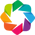

In [2]:
from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure
from bokeh.transform import transform
from bokeh.models import BasicTicker, ColorBar, ColumnDataSource, LinearColorMapper, PrintfTickFormatter, HoverTool

from ipywidgets import interact
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.palettes import OrRd9

from holoviews.operation.datashader import datashade, shade, dynspread, rasterize


output_notebook()
hv.extension('bokeh')

Let's load up the various csv files as pandas dataframes and make a few initial tweaks. To begin with, let's import the main 2005 to 2014 data, which is available as a triplet of csv files.

In [3]:
data = {}
data['acc'] = pd.read_csv('Accidents0514.csv', dtype = {'LSOA_of_Accident_Location': object}) # explicitly specifying dtype of a mixed column, in order to avoid warnings
data['veh'] = pd.read_csv('Vehicles0514.csv')
data['cas'] = pd.read_csv('Casualties0514.csv')

Additional data for 1979 to 2004 as well as 2015 and 2016 is imported separately; note that for the latter we also have some files that include make and model data for the cars involved in the accidents, so we import that as well.

In [4]:
data['acc7904'] = pd.read_csv('Accidents7904.csv', dtype = {'Local_Authority_(Highway)': object,'LSOA_of_Accident_Location': object}) # Importing older 1979 to 2004 data
data['veh7904'] = pd.read_csv('Vehicles7904.csv')
data['cas7904'] = pd.read_csv('Casualty7904.csv')
                              
data['acc16'] = pd.read_csv('dftRoadSafety_Accidents_2016.csv', dtype = {'LSOA_of_Accident_Location': object}) # Importing the separate 2016 data
data['veh16'] = pd.read_csv('Veh16.csv')
data['cas16'] = pd.read_csv('Cas16.csv')
data['mm16'] = pd.read_csv('MakeModel2016.csv')

data['acc15'] = pd.read_csv('Accidents_2015.csv', dtype = {'Accident_Index': object}) # Importing the 2015 data
data['veh15'] = pd.read_csv('Vehicles_2015.csv')
data['cas15'] = pd.read_csv('Casualties_2015.csv')
data['mm15'] = pd.read_csv('2015_Make_Model.csv')

We are also going to make a few small formatting changes to how our results will be displayed:

In [5]:
pd.set_option('max_columns', 64)
pd.set_option('max_rows', 32)
pd.options.display.float_format = '{:.3f}'.format # Display floats with 3 decimal digits of precision

Let's take a look at the various files and what kind of data we have at our disposal by printing out the heads of the three main files:

In [6]:
data['acc'].head()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001             525680.000              178240.000     -0.191   
1  200501BS00002             524170.000              181650.000     -0.212   
2  200501BS00003             524520.000              182240.000     -0.206   
3  200501BS00004             526900.000              177530.000     -0.174   
4  200501BS00005             528060.000              179040.000     -0.157   

   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0    51.489             1                  2                   1   
1    51.520             1                  3                   1   
2    51.525             1                  3                   2   
3    51.482             1                  3                   1   
4    51.496             1                  3                   1   

   Number_of_Casualties        Date  Day_of_Week   Time  \
0                     1  04/01/2005            3  17:42   
1                     1  05/01/2005            4  17:36   
2                     1  06/01/2005            5  00:15   
3                     1  07/01/2005            6  10:35   
4                     1  10/01/2005            2  21:13   

   Local_Authority_(District) Local_Authority_(Highway)  1st_Road_Class  \
0                          12                 E09000020               3   
1                          12                 E09000020               4   
2                          12                 E09000020               5   
3                          12                 E09000020               3   
4                          12                 E09000020               6   

   1st_Road_Number  Road_Type  Speed_limit  Junction_Detail  Junction_Control  \
0             3218          6           30                0                -1   
1              450          3           30                6                 2   
2                0          6           30                0                -1   
3             3220          6           30                0                -1   
4                0          6           30                0                -1   

   2nd_Road_Class  2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
0              -1                0                                  0   
1               5                0                                  0   
2              -1                0                                  0   
3              -1                0                                  0   
4              -1                0                                  0   

   Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                        1                 1   
1                                        5                 4   
2                                        0                 4   
3                                        0                 1   
4                                        0                 7   

   Weather_Conditions  Road_Surface_Conditions  Special_Conditions_at_Site  \
0                   2                        2                           0   
1                   1                        1                           0   
2                   1                        1                           0   
3                   1                        1                           0   
4                   1                        2                           0   

   Carriageway_Hazards  Urban_or_Rural_Area  \
0                    0                    1   
1                    0                    1   
2                    0                    1   
3                    0                    1   
4                    0                    1   

   Did_Police_Officer_Attend_Scene_of_Accident LSOA_of_Accident_Location  
0                                            1                 E01002849  
1                                            1                 E01002909  
2                             

In [7]:
data['veh'].head()

Accident_Index  Vehicle_Reference  Vehicle_Type  Towing_and_Articulation  \
0  200501BS00001                  1             9                        0   
1  200501BS00002                  1            11                        0   
2  200501BS00003                  1            11                        0   
3  200501BS00003                  2             9                        0   
4  200501BS00004                  1             9                        0   

   Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
0                 18                                 0                  0   
1                  4                                 0                  3   
2                 17                                 0                  0   
3                  2                                 0                  0   
4                 18                                 0                  0   

   Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                         0                          0   
1                         0                          0   
2                         0                          4   
3                         0                          0   
4                         0                          0   

   Vehicle_Leaving_Carriageway  Hit_Object_off_Carriageway  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   1st_Point_of_Impact  Was_Vehicle_Left_Hand_Drive?  \
0                    1                             1   
1                    4                             1   
2                    4                             1   
3                    3                             1   
4                    1                             1   

   Journey_Purpose_of_Driver  Sex_of_Driver  Age_of_Driver  \
0                         15              2             74   
1                          1              1             42   
2                          1              1             35   
3                         15              1             62   
4                         15              2             49   

   Age_Band_of_Driver  Engine_Capacity_(CC)  Propulsion_Code  Age_of_Vehicle  \
0                  10                    -1               -1              -1   
1                   7                  8268                2               3   
2                   6                  8300                2               5   
3                   9                  1762                1               6   
4                   8                  1769                1               4   

   Driver_IMD_Decile  Driver_Home_Area_Type  
0                  7                      1  
1                 -1                     -1  
2                  2                      1  
3                  1                      1  
4                  2                      1

In [8]:
data['cas'].head()

Accident_Index  Vehicle_Reference  Casualty_Reference  Casualty_Class  \
0  200501BS00001                  1                   1               3   
1  200501BS00002                  1                   1               2   
2  200501BS00003                  2                   1               1   
3  200501BS00004                  1                   1               3   
4  200501BS00005                  1                   1               1   

   Sex_of_Casualty  Age_of_Casualty  Age_Band_of_Casualty  Casualty_Severity  \
0                1               37                     7                  2   
1                1               37                     7                  3   
2                1               62                     9                  3   
3                1               30                     6                  3   
4                1               49                     8                  3   

   Pedestrian_Location  Pedestrian_Movement  Car_Passenger  \
0                    1                    1              0   
1                    0                    0              0   
2                    0                    0              0   
3                    5                    2              0   
4                    0                    0              0   

   Bus_or_Coach_Passenger  Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
0                       0                                  -1              0   
1                       4                                  -1             11   
2                       0                                  -1              9   
3                       0                                  -1              0   
4                       0                                  -1              3   

   Casualty_Home_Area_Type  
0                        1  
1                        1  
2                        1  
3                        1  
4                       -1

As we have mentioned before, the majority of the data is displayed using police codes rather than textual descriptions, so to understand the meaning of many of the columns we have to check the companion "Road-Accident-Safety-Data-Guide.xls" spreadsheet. It's already easy to gather a lot of information with some very simple queries. For example, if we wanted some insight into the age of the car drivers involved in accidents we could do the following:

In [9]:
data['veh'][data['veh']['Vehicle_Type'] == 9]['Age_of_Driver'].describe() # Vehicle type 9 corresponds to car drivers

count   2205201.000
mean         34.594
std          19.986
min          -1.000
25%          22.000
50%          34.000
75%          48.000
max         100.000
Name: Age_of_Driver, dtype: float64

This immediately provides some fairly interesting data, such as the median age of car drivers involved in accidents being 34. We can also readily conduct somewhat more detailed analyses. For example, if we wanted to get some information on the ages of casualties depending on their severity among several common types of vehicles, we could run the following query:

In [10]:
data['cas'][data['cas']['Casualty_Type'].isin([0,1,9,5])].groupby(['Casualty_Severity', 'Casualty_Type'])['Age_of_Casualty'].describe()

count   mean    std    min    25%  \
Casualty_Severity Casualty_Type                                           
1                 0                5186.000 50.419 25.733 -1.000 27.000   
                  1                1207.000 42.944 20.652 -1.000 26.000   
                  5                3320.000 39.630 12.651 -1.000 30.000   
                  9               10990.000 40.249 22.757 -1.000 21.000   
2                 0               57001.000 34.299 25.064 -1.000 13.000   
                  1               27503.000 35.098 17.517 -1.000 21.000   
                  5               27446.000 39.349 13.018 -1.000 30.000   
                  9               96871.000 37.387 20.545 -1.000 21.000   
3                 0              213678.000 29.577 22.052 -1.000 13.000   
                  1              149819.000 31.053 16.484 -1.000 18.000   
                  5               54979.000 37.835 13.096 -1.000 28.000   
                  9             1260968.000 34.852 18.096 -1.000 21.000   

                                   50%    75%     max  
Casualty_Severity Casualty_Type                        
1                 0             50.000 75.000  99.000  
                  1             42.000 58.000  96.000  
                  5             39.000 48.000  89.000  
                  9             32.000 58.000  99.000  
2                 0             27.000 53.000  99.000  
                  1             35.000 47.000  91.000  
                  5             40.000 48.000  90.000  
                  9             32.000 51.000  99.000  
3                 0             23.000 43.000 103.000  
                  1             30.000 42.000  99.000  
                  5             38.000 47.000  92.000  
                  9             31.000 46.000 102.000

The result is a table summarising the main attributes of the data, grouped by casualty severity (1 corresponding to "fatal", 2 to "serious" and 3 to "slight") along with their type: 0 are "pedestrians", 1 are "cyclists", 5 are "motorcyclists over 500cc (rider or passenger)" and finally 9 are "car occupants". We can see, for example, that the median age for fatal pedestrian casualties is 50, while for slight injuries it is just 23.

By default, Pandas reads the 'Date' column as a string (or, more precisely, the "object" dtype). We could use the to_datetime function to convert it to a datetime64 dtype in order to allow us to extract the year or month from it directly, but this is rather time-consuming. We instead just use a common data-cleaning trick in order to do that, taking advantage of the fact that the date strings are in dd/mm/yyyy format and the year is just represented by the final four characters:

In [11]:
# Creating a separate column for the year:
data['acc']['Year'] = pd.to_numeric(data['acc']['Date'].str[6:10])
data['acc15']['Year'] = pd.to_numeric(data['acc15']['Date'].str[6:10])
data['acc16']['Year'] = pd.to_numeric(data['acc16']['Date'].str[6:10])
data['acc7904']['Year'] = pd.to_numeric(data['acc7904']['Date'].str[6:10])

# Creating a separate column for the hour of the day:
data['acc']['Hour'] = data['acc']['Time'].str[0:2]
data['acc15']['Hour'] = data['acc15']['Time'].str[0:2]
data['acc16']['Hour'] = data['acc16']['Time'].str[0:2]
data['acc7904']['Hour'] = data['acc7904']['Time'].str[0:2]

In [12]:
# Alternative less efficient method:

#data['acc']['Date'] = pd.to_datetime(data['acc']['Date'], format = "%d/%m/%Y")
#data['acc15']['Date'] = pd.to_datetime(data['acc15']['Date'], format = "%d/%m/%Y")
#data['acc16']['Date'] = pd.to_datetime(data['acc16']['Date'], format = "%d/%m/%Y")
#data['acc7904']['Date'] = pd.to_datetime(data['acc7904']['Date'], format = "%d/%m/%Y")

Finally, for applications where we might like to consider the recent as well as the historical data at the same time, it makes sense to merge all the smaller dataframes into one in order to make this easier:

In [13]:
data['acc0416'] = data['acc'].append(data['acc15']).append(data['acc16'])
data['acc_all'] = data['acc7904'].append(data['acc'].append(data['acc15']).append(data['acc16']))

In [14]:
# The following are time-consuming and not currently used:
#data['veh0416'] = data['veh'].append(data['veh15']).append(data['veh16'])
#data['veh_all'] = data['veh7904'].append(data['veh'].append(data['veh15']).append(data['veh16']))

In [15]:
#data['cas0416'] = data['cas'].append(data['cas15']).append(data['cas16'])
#data['cas_all'] = data['cas7904'].append(data['cas'].append(data['cas15']).append(data['cas16']))

### Location data

One very natural visualisation is to display the individual accidents on a map by using the latitude and longitude coordinates provided for each individual accident. We first define a simple function that converts latitude and longitude to Web Mercator corodinates, since this is what our map visualisation tools natively use:

In [16]:
def convert_coordinates(df, lon="lon", lat="lat"):
    """Adds 'x' and 'y' columns for coordinates in Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

It's now easy to use Bokeh to render a map displaying the location of all fatal accidents in 2016 in Britain:

In [17]:
acc_map = figure(title = "Map: Fatal accidents in 2016", x_range=(-815000, -100000), y_range=(6400000, 8150000), # set the coordinate range to display the UK by default
           x_axis_type="mercator", y_axis_type="mercator")
acc_map.add_tile(CARTODBPOSITRON)

df = data['acc16']
convert_coordinates(df,"Longitude","Latitude") # adding Web Mercator coordinates to a copy of data['acc16']

map_source = ColumnDataSource(df[df['Accident_Severity'] == 1]) # filtering only fatal accidents

acc_map.circle(x="x", y="y", size=4, color = 'red', fill_alpha=0.67, source=map_source)

show(acc_map)

The Bokeh toolbar above allows easy interaction with the map, being able to zoom in and out to various levels. While this already shows us a few interesting tendencies, the relatively small amount of data makes it a little less interesting. Using the entire dataset with this kind of visualisation would render the interactive map very sluggish and very difficult to read at the wider zoom levels, so we use a technique called datashading to render the density of the data rather than every individual datapoint at the lower zooms while still maintaining detail at the higher zoom levels if we wish. The following two maps display all accidents (respectively all fatal accidents) in Great Britain since 2004 (location data only started to be recorded in 1999). This gives us an idea of the scale of the data as well as allowing us to identify the areas with the highest accident density at a glance.

In [18]:
convert_coordinates(data['acc0416'],"Longitude","Latitude"); # adding Web Mercator coordinates to all of the data

In [19]:
%%output size=100
%%opts Points [height=800 width=600]
%%opts WMTS [width=800 height=600 xaxis=None yaxis=None]

# Dynspread visibility tweaking:
dynspread.max_px=32
dynspread.threshold=0.25


accidents = hv.Points((data['acc0416']['x'],data['acc0416']['y']),label="Accidents")
fatal = hv.Points((data['acc0416'][data['acc0416']['Accident_Severity'] == 1]['x'],data['acc0416'][data['acc0416']['Accident_Severity'] == 1]['y']),label="Fatal")

hv.NdLayout({'All Accidents (from 2004 to 2016)': gv.WMTS(CARTODBPOSITRON) * dynspread(datashade(accidents, cmap = "#30a2da")),
             'Fatal Accidents (from 2004 to 2016)': gv.WMTS(CARTODBPOSITRON) * dynspread(datashade(fatal, cmap = 'red'), how = 'saturate')
            }, kdims=['Map']).cols(1)

:NdLayout   [Map]
   :DynamicMap   []
      :Overlay
         .WMTS.I    :WMTS   [Longitude,Latitude]
         .RGB.Fatal :RGB   [x,y]   (R,G,B,A)

### Number of accidents over the years
A natural question is to check the evolution of the number of accidents over the years. This is readily done:

In [20]:
num_acc = np.array(data['acc0416']['Year'].value_counts(sort = False).sort_index().tolist())
year = np.array(data['acc0416']['Year'].value_counts(sort = False).sort_index().index.tolist())

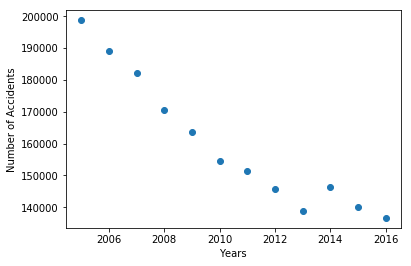

In [21]:
plt.plot(year,num_acc,'o')

plt.xlabel('Years')
plt.ylabel('Number of Accidents')

plt.show()
plt.close()

It looks like the decline in the total number of accidents from 2004 to 2013 is roughly linear, so we can use a simple linear regression to view this and check what the rate of decline is.

In [22]:
t = np.polyfit(year[:-3],num_acc[:-3],1)
X_old = np.vstack((year[:-3],np.ones(year[:-3].size)))
t

array([-7.47548333e+03,  1.51842766e+07])

It appears accidents in that period were falling by approximately 7500 per year on average.

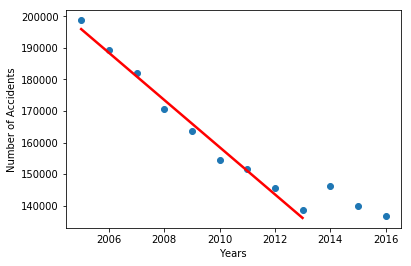

In [23]:
plt.plot(year,num_acc,'o')
plt.plot(X_old[0],t.dot(X_old),'r-', linewidth = 2.5)

plt.xlabel('Years')
plt.ylabel('Number of Accidents')

plt.show()
plt.close()

As we can see from the following graph that dispalys the entire range of the data (from 1979 to 2016), this was not necessarily typical. The sharp linear decline presents from the early 2000s while its evolution is significantly more erratic prior to this.

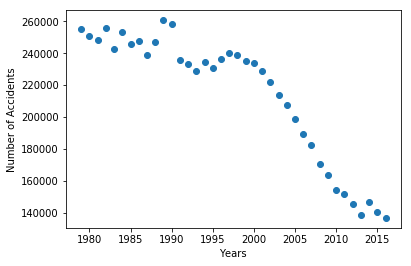

In [24]:
num_acc_all = np.array(data['acc_all']['Year'].value_counts(sort = False).sort_index().tolist())
year_all = np.array(data['acc_all']['Year'].value_counts(sort = False).sort_index().index.tolist())

plt.plot(year_all,num_acc_all,'o')

plt.xlabel('Years')
plt.ylabel('Number of Accidents')

plt.show()
plt.close()

In [25]:
(np.where(year_all == 2000)[0][0],np.where(year_all == 2013)[0][0]) # finding the range for the following plot

(21, 34)

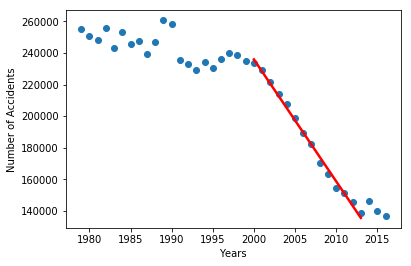

In [26]:
t = np.polyfit(year_all[21:35],num_acc_all[21:35],1)
X = np.vstack((year_all[21:35],np.ones(year_all[21:35].size)))

plt.plot(year_all,num_acc_all,'o')
plt.plot(X[0],t.dot(X),'r-', linewidth = 2.5)

plt.xlabel('Years')
plt.ylabel('Number of Accidents')

plt.show()
plt.close()

In [27]:
t # Checking the rate of decline over the whole period

array([-7.72380879e+03,  1.56835516e+07])

One possible avenue is to see whether there was a difference in the evolution of the number of accidents in rural or urban settings (for example as a result of a particular government policy favouring one over the other or advances in technology that affected these separate styles of driving differently):

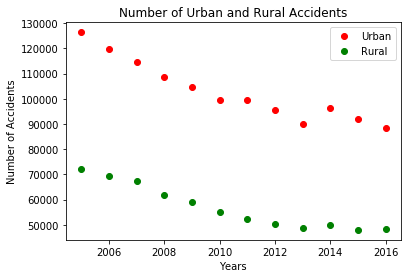

In [28]:
num_acc = np.array(data['acc0416']['Year'].value_counts(sort = False).tolist())

num_acc_urb = np.array(data['acc0416'][data['acc0416']['Urban_or_Rural_Area'] == 1]['Year'].value_counts(sort = False).sort_index().tolist())
num_acc_rur = np.array(data['acc0416'][data['acc0416']['Urban_or_Rural_Area'] == 2]['Year'].value_counts(sort = False).sort_index().tolist())

year = np.array(data['acc0416']['Year'].value_counts(sort = False).sort_index().index.tolist())

pu = plt.plot(year,num_acc_urb,'ro')
pr = plt.plot(year,num_acc_rur,'go')

labels = ['Urban', 'Rural']
plt.legend((pu[0], pr[0]), labels)

plt.xlabel('Years')
plt.ylabel('Number of Accidents')
plt.title('Number of Urban and Rural Accidents')

plt.show()
plt.close()

We can in fact see that while there are more urban accidents, their rate of decline was mildly quicker and the urban accidents account for more of the spike in accidents of 2014 that is visible in the original graph as well. The dataset allows us to query how many of these were fatal and see whether there is a significant difference in the proportion of fatal accidents as well:

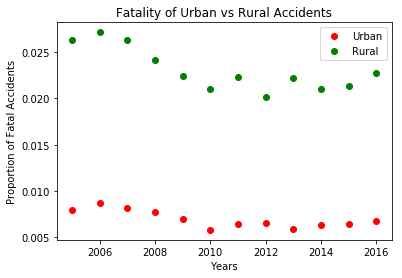

In [29]:
num_acc_urb_f = np.array(data['acc0416'][(data['acc0416']['Urban_or_Rural_Area'] == 1) & 
                                         (data['acc0416']['Accident_Severity'] == 1)]['Year'].value_counts(sort = False).sort_index().tolist())
num_acc_rur_f = np.array(data['acc0416'][(data['acc0416']['Urban_or_Rural_Area'] == 2) & 
                                         (data['acc0416']['Accident_Severity'] == 1)]['Year'].value_counts(sort = False).sort_index().tolist())

pu = plt.plot(year,num_acc_urb_f/num_acc_urb,'ro')
pr = plt.plot(year,num_acc_rur_f/num_acc_rur,'go')

plt.xlabel('Years')
plt.ylabel('Proportion of Fatal Accidents')
plt.title('Fatality of Urban vs Rural Accidents')

labels = ['Urban', 'Rural']
plt.legend((pu[0], pr[0]), labels)

plt.show()
plt.close()

We see from this that although there are more urban accidents, rural ones are more frequently fatal and so we can conclude that rural driving on the whole is arguably more dangerous: the percentage of fatal urban accidents is barely above 0.5%, however for rural areas this increases to more than 2% for most years.

### Accident severity breakdown

We can look at the data regarding the severity of accidents in more detail. The following shows the evolution of the number of serious or fatal accidents for every year of the dataset.

In [30]:
data['acc_all']['Accident_Severity'].value_counts()

3    6535786
2    1473460
1     132226
Name: Accident_Severity, dtype: int64

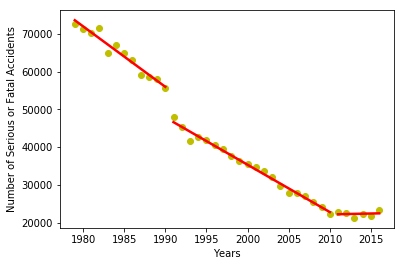

In [31]:
fatal_count = np.array(data['acc_all'][data['acc_all']['Accident_Severity'] == 1]['Year'].value_counts(sort = False).sort_index().tolist())

fatal_or_serious_count = np.array(data['acc_all'][data['acc_all']['Accident_Severity'].isin([1,2])]['Year'].value_counts(sort = False).sort_index().tolist())

years = np.array(data['acc_all'][data['acc_all']['Accident_Severity'] == 1]['Year'].value_counts(sort = False).sort_index().index)


plt.plot(years,fatal_or_serious_count, 'yo')
#plt.plot(years,num_acc_all, 'go')

t1 = np.polyfit(years[12:32],fatal_or_serious_count[12:32],1)
X1 = np.vstack((years[12:32],np.ones(years[12:32].size)))

t2 = np.polyfit(years[:12],fatal_or_serious_count[:12],1)
X2 = np.vstack((years[:12],np.ones(years[:12].size)))

t3 = np.polyfit(years[32:],fatal_or_serious_count[32:],1)
X3 = np.vstack((years[32:],np.ones(years[32:].size)))

plt.plot(X1[0],t1.dot(X1),'r-', linewidth = 2.5)
plt.plot(X2[0],t2.dot(X2),'r-', linewidth = 2.5)
plt.plot(X3[0],t3.dot(X3),'r-', linewidth = 2.5)

plt.xlabel('Years')
plt.ylabel('Number of Serious or Fatal Accidents')

plt.show()
plt.close()

It is important to note that the slight/serious categorisation of accidents can be at least somewhat subjective. The following quote from the official guidelines for the STATS19 form clarifies the definition of a serious injury:
"_An injury for which a person is detained in hospital as an “in-patient”, or any of the following injuries whether or not they are detained in hospital: fractures, concussion, internal injuries, crushings, burns (excluding friction burns), severe cuts,
severe general shock requiring medical treatment and injuries causing death 30 or more days after the accident. An injured casualty is recorded as seriously or slightly injured by the police on the basis of information available within a short time of the accident. This generally will not reflect the results of a medical examination, but may be influenced according to whether the casualty is hospitalised or not. Hospitalisation procedures will vary regionally._"

On the other hand, whether an accident was fatal or not is certainly more clear-cut and looking again at the proportion of fatal accidents among all accidents in a given year gives us a more objective measure of how safe the roads were in a given year, since it is less dependant on factors for which we cannot control (such as the total number of road users in a given year, which would have a clear impact on the total number of accidents in a given year without necessarily making the roads less safe in a commensurate way).

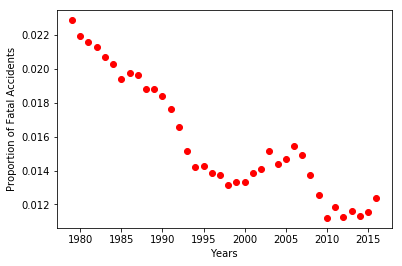

In [32]:
plt.plot(years,fatal_count/num_acc_all, 'ro')


plt.xlabel('Years')
plt.ylabel('Proportion of Fatal Accidents')

plt.show()
plt.close()

We can see from the above that the proportion of fatal accidents was in steady decline throughout the 1980s and early 1990s but actually had a slight resurgence in the early 2000s before again falling sharply before 2010 and reaching a plateau around 12%. This contrasts with the graphs above that showed a straightforward decline in the number of accidents and gives us some additional nuance, particularly in terms of showing the relative danger of driving over the years.

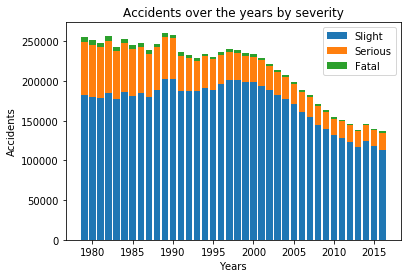

In [33]:
fatal_count = np.array(data['acc_all'][data['acc_all']['Accident_Severity'] == 1]['Year'].value_counts(sort = False).sort_index().tolist())
serious_count = np.array(data['acc_all'][data['acc_all']['Accident_Severity'] == 2]['Year'].value_counts(sort = False).sort_index().tolist())
slight_count = np.array(data['acc_all'][data['acc_all']['Accident_Severity'] == 3]['Year'].value_counts(sort = False).sort_index().tolist())

years =  np.array(data['acc_all'][data['acc_all']['Accident_Severity'] == 1]['Year'].value_counts(sort = False).index)

p1 = plt.bar(years, slight_count)
p2 = plt.bar(years, serious_count, bottom=slight_count)
p3 = plt.bar(years, fatal_count, bottom=serious_count+slight_count)

plt.xlabel('Years')
plt.ylabel('Accidents')
plt.title('Accidents over the years by severity')

labels = ['Slight', 'Serious', 'Fatal']
plt.legend((p1[0], p2[0], p3[0]), labels)

plt.show()
plt.close()

### Speed Limit Analysis

In this section we analyse the public perception that roads with higher speed limits are fundamentally more dangerous than those with lower ones.

In [34]:
fatal_per_limit = np.array(data['acc0416'][data['acc0416']['Accident_Severity'] == 1]['Speed_limit'].value_counts(sort = False).sort_index().tolist())
serious_per_limit = np.array(data['acc0416'][data['acc0416']['Accident_Severity'] == 2]['Speed_limit'].value_counts(sort = False).sort_index().tolist())
slight_per_limit = np.array(data['acc0416'][data['acc0416']['Accident_Severity'] == 3]['Speed_limit'].value_counts(sort = False).sort_index().tolist())
total_per_limit = np.array(data['acc0416']['Speed_limit'].value_counts(sort = False).sort_index().tolist())

speeds_fatal =  np.array(data['acc0416'][data['acc0416']['Accident_Severity'] == 1]['Speed_limit'].value_counts(sort = False).sort_index().index)
speeds_serious =  np.array(data['acc0416'][data['acc0416']['Accident_Severity'] == 2]['Speed_limit'].value_counts(sort = False).sort_index().index)
speeds_total =  np.array(data['acc0416']['Speed_limit'].value_counts(sort = False).sort_index().index)

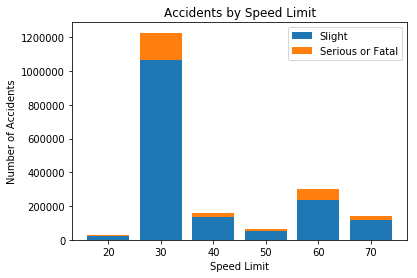

In [35]:
p1 = plt.bar(speeds_total[3:], slight_per_limit[3:], width = 8) # Ignoring the first three limits as they are extremely rare
p2 = plt.bar(speeds_total[3:], serious_per_limit[2:]+fatal_per_limit[1:], bottom=slight_per_limit[3:], width = 8)

plt.xlabel('Speed Limit')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Speed Limit')

labels = ['Slight', 'Serious or Fatal']
plt.legend((p1[0], p2[0]), labels)

plt.show()
plt.close()

Here is the fatal breakdown in more detail:

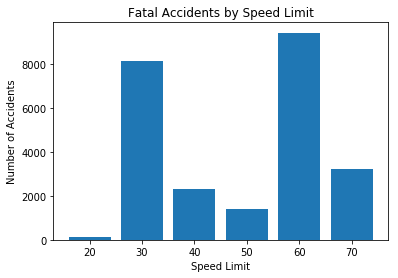

In [36]:
p3 = plt.bar(speeds_fatal[1:], fatal_per_limit[1:], width = 8)

plt.xlabel('Speed Limit')
plt.ylabel('Number of Accidents')
plt.title('Fatal Accidents by Speed Limit')

plt.show()
plt.close()

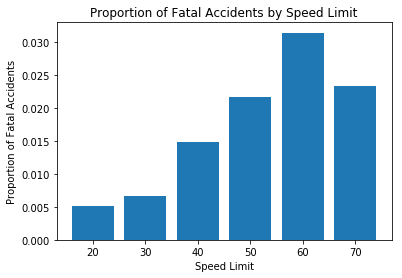

In [37]:
p4 = plt.bar(speeds_fatal[1:], fatal_per_limit[1:]/total_per_limit[3:], width = 8)

plt.xlabel('Speed Limit')
plt.ylabel('Proportion of Fatal Accidents')
plt.title('Proportion of Fatal Accidents by Speed Limit')

plt.show()
plt.close()

The above breakdown shows that while most accidents happen in 30 mph speed limit areas (as one would expect given that these are most often dense urban areas with more traffic and unpredictability), the number of fatal accidents is higher on 60 mph limit roads, which are typically single carriageway rural roads. In fact, if we check for the proportion of fatal accidents as we previously have, we can see that the likelihood of an accident being fatal is comparatively low for the lower speed limits, as one would expect, and peaks at 60 mph limit areas. The danger of fatal accidents appears to be lesser on 70mph dual carriageways and motorways, which perhaps goes against many people's expectation that these roads are particularly dangerous because of their higher speeds.

### Breakdown of accidents by time of the week

Another interesting angle of analysis is to check what kind of times of the day are most dangerous to drive at. The following bar graph breaks down the number of fatal accidents for each hour of the day for a given year (which we can select using the slider underneath). Since we are less interested in the first few years of the dataset, the graph axes are set up so as to be the most instructive for the most recent decades. Nevertheless, we can still recover the numerical data for all years by hovering over the bars.

In [38]:
yr = 2016
source_data = data['acc_all'][(data['acc_all']['Accident_Severity'] == 1) & (data['acc_all']['Year'] == yr)].groupby('Hour')
source_bar = ColumnDataSource(source_data)

In [39]:
int_bar = figure(title = "Number of Accidents by Hour in "+ str(yr), plot_width=800, plot_height=600,
                 x_range=source_data, y_range=[0,250], toolbar_location=None, tools="")

r_int_bar = int_bar.vbar(x='Hour', top='Year_count', width=1, source=source_bar, line_color="white")

int_bar.add_tools(HoverTool(tooltips=[("Number of accidents", "@Year_count")]))
int_bar.xaxis.axis_label = "Hour of the Day"
int_bar.yaxis.axis_label = "Number of Accidents"
int_bar.title.text_font_size = "18px"

int_bar_handle = show(int_bar, notebook_handle=True)

In [40]:
def update(year = 2016):
    r_int_bar.data_source.data['Year_count'] = data['acc_all'][(data['acc_all']['Accident_Severity'] == 1) &
                                                               (data['acc_all']['Year'] == year)].groupby('Hour').Year.count()
    int_bar.title.text = "Number of Accidents by Hour in "+ str(year)
    push_notebook(handle = int_bar_handle)

In [41]:
interact(update, year = (1979,2016))

interactive(children=(IntSlider(value=2016, description='year', max=2016, min=1979), Output()), _dom_classes=(…

<function __main__.update(year=2016)>

The evolution is interesting since in addition to the general decline in the number of accidents that we have seen before, we can identify a few other more specific trends as well. For example, the number of early night-time accidents drops very dramatically between 1979 and 2016 (as one would expect), but th

We can be even more precise by looking not only at the hours but also the days of the week, since it is natural to expect the distribution to be different on weekends and workdays, for example. A heatmap is an elegant way to display this information, since it gives us an extra dimension to work with.

In [42]:
def day(x):
    """Relabel the days of the week with strings for better readability"""
    if x == 1:
        return 'Sun'
    elif x == 2:
        return 'Mon'
    elif x == 3:
        return 'Tue'
    elif x == 4:
        return 'Wed'
    elif x == 5:
        return 'Thu'
    elif x == 6:
        return 'Fri'
    elif x == 7:
        return 'Sat'

data['acc_all']['Day'] = data['acc_all']['Day_of_Week'].apply(day) # This makes the data slightly easier to read

In [43]:
data['acc_all']['Hour'] = data['acc_all']['Time'].str[0:2] # Defining a new column by extracting the hour of the accident

In [44]:
group_by_day_hour = data['acc_all'][data['acc_all']['Year'] == 2016].groupby(['Day','Hour'])

hd = group_by_day_hour.size()
newindex = []
for i in ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']:
    for j in range(0,24):
        newindex.append((i , '%02d'%j))
heatdata = hd.reindex(newindex).reset_index()
heatdata.columns = ['Day', 'Hour', 'Number_of_Accidents']

In [45]:
source = ColumnDataSource(heatdata)

hours = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
         '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hours.reverse()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = list(reversed(OrRd9))

mapper = LinearColorMapper(palette=colors, low=heatdata['Number_of_Accidents'].min(), high=heatdata['Number_of_Accidents'].max())

p = figure(plot_width=800, plot_height=600, title="Week/Hour Accident Distribution in 2016",
           x_range=days, y_range=hours, toolbar_location=None, tools="", x_axis_location="above")

r = p.rect(x="Day", y="Hour", width=1, height=1, source=source, line_color=None, fill_color=transform('Number_of_Accidents',
                                                                                                      mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0), ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d"),label_standoff=7)

p.add_layout(color_bar, 'right')

p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "8pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0
p.title.text_font_size = "18px"

r.data_source.data['Number_of_Accidents'] = heatdata['Number_of_Accidents']

p.add_tools(HoverTool(tooltips=[("Number of accidents", "@Number_of_Accidents")]))

In [46]:
def update(yr = 2016):
    group_by_day_hour = data['acc_all'][(data['acc_all']['Year'] == yr)].groupby(['Day','Hour'])
    hd = group_by_day_hour.size()
    newindex = []
    for i in ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']:
        for j in range(0,24):
            newindex.append((i , '%02d'%j))
    heatdata = hd.reindex(newindex).reset_index()
    heatdata.columns = ['Day', 'Hour', 'Number_of_Accidents']
    r.data_source.data['Number_of_Accidents'] = heatdata['Number_of_Accidents']
    mapper = LinearColorMapper(palette=colors, low=heatdata['Number_of_Accidents'].min(), high=heatdata['Number_of_Accidents'].max())
    color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d"),label_standoff=7)
    p.title.text = title="Week/Hour Accident Distribution in "+ str(yr)
    
    push_notebook(handle = t)

In [47]:
t = show(p, notebook_handle=True)

In [48]:
interact(update, yr = (1979,2016))

interactive(children=(IntSlider(value=2016, description='yr', max=2016, min=1979), Output()), _dom_classes=('w…

<function __main__.update(yr=2016)>

This shows us that the majority of accidents take place around the times that people commute to and from work, namely around 8am and 5pm. As before, however, we can analyse how dangerous the roads are with a little bit more precision by looking at the percentage of fatal accidents:

In [49]:
gpb_dh = data['acc_all'][data['acc_all']['Year'].isin(range(2007,2017))].groupby(['Day','Hour'])

hd2 = gpb_dh.size()

heatdata2 = hd2.reindex(newindex).reset_index()
heatdata2.columns = ['Day', 'Hour', 'Number_of_Accidents']


In [50]:
gpb_dh_f = data['acc_all'][(data['acc_all']['Year'].isin(range(2007,2017))) & (data['acc_all']['Accident_Severity'] == 1)].groupby(['Day','Hour'])

hd3 = gpb_dh_f.size()

heatdata3 = hd3.reindex(newindex).reset_index()
heatdata3.columns = ['Day', 'Hour', 'Number_of_Fatal_Accidents']

heatdata2['Fatality'] = heatdata3['Number_of_Fatal_Accidents']/heatdata2['Number_of_Accidents']

In [51]:
source = ColumnDataSource(heatdata2)

hours = ['00', '01', '02', '03','04','05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23']
hours.reverse()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = list(reversed(OrRd9))

mapper = LinearColorMapper(palette=colors, low=0, high=0.05)

p = figure(plot_width=800, plot_height=600, title="Week/Hour Accident Fatality from 2007 to 2016",
           x_range=days, y_range=hours,
           toolbar_location=None, tools="", x_axis_location="above")

r = p.rect(x="Day", y="Hour", width=1, height=1, source=source,
       line_color=None, fill_color=transform('Fatality', mapper))

color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%f"),label_standoff=8)

p.add_layout(color_bar, 'right')

p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "8pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0
p.title.text_font_size = "18px"
p.add_tools(HoverTool(tooltips=[("Proportion of fatal accidents", "@Fatality{0,0.000}")]))

t2 = show(p, notebook_handle=True)

Checking for the proportion of fatal accidents does give us some additional insight: very few of the accidents at rush hour are fatal, suggesting that many of them are minor accidents taking place because of the increased traffic. On the other hand, the early hours of the night are those where the danger of fatal accidents is the highest, likely because of the decreased visibility and higher driver fatigue on the roads at those times. It's interesting to note that while the weekday rush hour peaks are not present on the weekends, the proportion of fatal accidents is not significantly different: while weekends are generally a little bit more dangerous during the day than weekdays, the proportion of fatal accidents is not notably higher at the night-time peaks on Friday and Saturday nights. It does however spike on late Sunday nights, perhaps due to the tiredness experienced by people returning from long weekend trips.